# MAI371 – Deep Learning
## LAB Exercise – 2
Date: 23 – 02 – 2024<br>
Duration: 2 Hrs

1.You are working for a financial institution that is concerned about fraudulent transactions on its
credit card platform. Your task is to develop a predictive model using Multilayer Perceptrons
(MLPs) with Keras/TensorFlow to detect fraudulent transactions based on transaction features.

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras


2024-03-01 10:08:17.202199: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-01 10:08:18.418496: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [12]:
df = pd.read_csv('/home/arj/TriSem3/Deep-learning/Lab/Lab 2/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
df.shape

(284807, 31)

In [15]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [16]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the numerical features to be scaled
numerical_features = ['Time','Amount']

# Fit and transform the scaler on the training data
df[numerical_features] = scaler.fit_transform(df[numerical_features])


There is no categorical values are in the data set so no need to perform encoding


In [17]:
#Train test split
from sklearn.model_selection import train_test_split

# Assuming 'df' contains your preprocessed DataFrame with features and target variable
X = df.drop('Class', axis=1)  # Features
y = df['Class']  # Target variable

# Split the dataset into training and testing sets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = X_train.shape[1]  # Number of features in the input data


# Training the model with different optimization algorithms and learning rates
# 1: RMSprop optimizer with a different learning rate
model_rmsprop = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 2: Adam optimizer with a different learning rate
model_adam = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/home/arj/anaconda3/envs/clg/lib/python3.12/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9975 - loss: 0.0147 - val_accuracy: 0.9993 - val_loss: 0.0053
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9993 - loss: 0.0046 - val_accuracy: 0.9993 - val_loss: 0.0054
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9994 - val_loss: 0.0044
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9993 - loss: 0.0045 - val_accuracy: 0.9992 - val_loss: 0.0054
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0045 - val_accuracy: 0.9993 - val_loss: 0.0044
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9994 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0035
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9993 - loss: 0

In [19]:
from sklearn import metrics
# Predict the labels for the test set of rmsprop
y_pred_rms = model_rmsprop.predict(X_test)
# Predict the labels for the test set of adam
y_pred_adam = model_adam.predict(X_test)

# Convert predicted probabilities to class predictions
class_predictions_r = (y_pred_rms > 0.5).astype(int)
class_predictions_a = (y_pred_adam > 0.5).astype(int)

# Now use class_predictions for evaluating the metrics of rmsprop
accuracy1 = metrics.accuracy_score(y_test, class_predictions_r)
precision1, recall1, f1_score1, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_r, average='binary')
roc_auc1= metrics.roc_auc_score(y_test, class_predictions_r)

# Now use class_predictions for evaluating the metrics of adam
accuracy2 = metrics.accuracy_score(y_test, class_predictions_a)
precision2, recall2, f1_score2, _ = metrics.precision_recall_fscore_support(y_test, class_predictions_a, average='binary')
roc_auc2 = metrics.roc_auc_score(y_test, class_predictions_a)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 971us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


[0.9992802219023208, 0.8904109589041096, 0.6632653061224489, 0.7602339181286549, 0.8315623097860415]
[0.9993153330290369, 0.8105263157894737, 0.7857142857142857, 0.7979274611398963, 0.8926988704879814]
Evaluation metrics of model with RMS prop optimizer


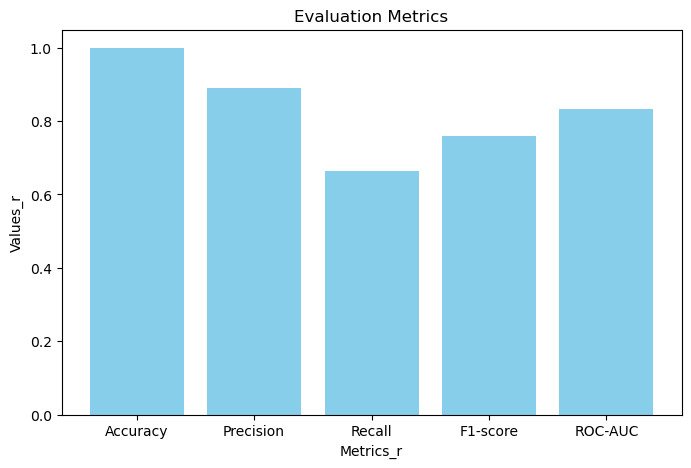

Evaluation metrics of model with adam optimizer


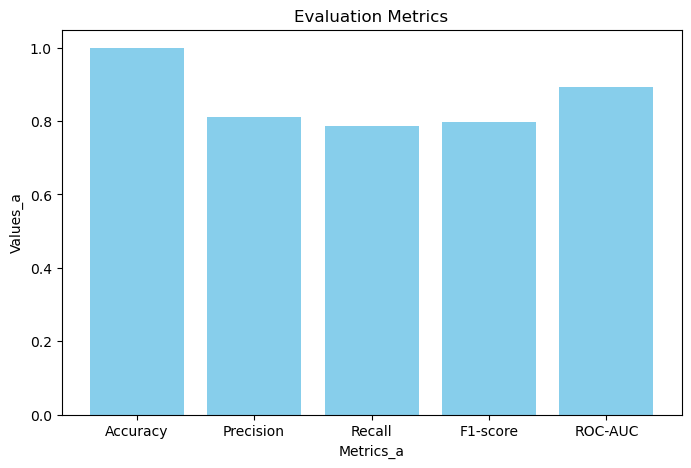

In [20]:
# Create a bar plot to visualize the evaluation metrics
import matplotlib.pyplot as plt

# Define the evaluation metrics and their respective values
metrics_r= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_r = [accuracy1, precision1, recall1, f1_score1, roc_auc1]
print(values_r)

# Define the evaluation metrics and their respective values
metrics_a= ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC']
values_a = [accuracy2, precision2, recall2, f1_score2, roc_auc2]
print(values_a)
print("Evaluation metrics of model with RMS prop optimizer")
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_r, values_r, color='skyblue')
plt.xlabel('Metrics_r')
plt.ylabel('Values_r')
plt.title('Evaluation Metrics')
plt.show()

print("Evaluation metrics of model with adam optimizer")
# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(metrics_a, values_a, color='skyblue')
plt.xlabel('Metrics_a')
plt.ylabel('Values_a')
plt.title('Evaluation Metrics')
plt.show()

confusion metrics of model with rms optimizer


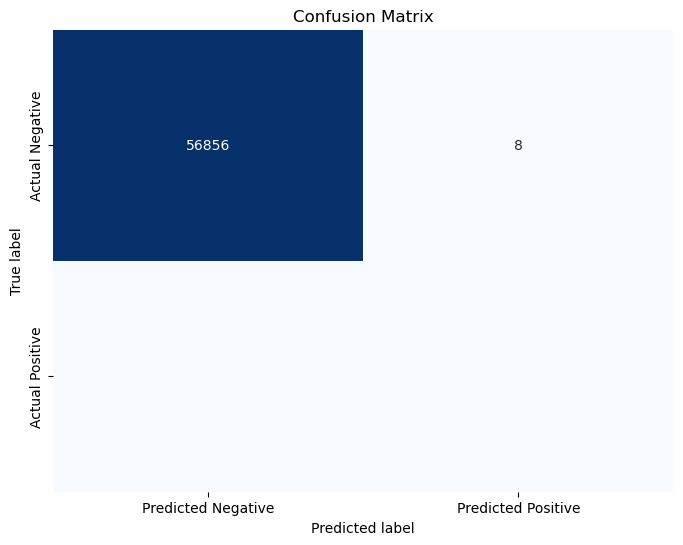

confusion metrics of model with adam optimizer


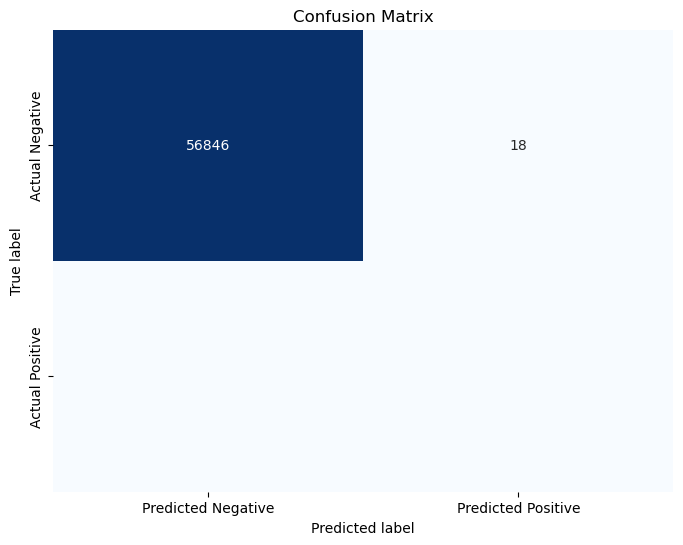

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for rms
conf_matrix_r = confusion_matrix(y_test, class_predictions_r)
print("confusion metrics of model with rms optimizer")
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_r, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()



# Calculate the confusion matrix for adam
conf_matrix_a = confusion_matrix(y_test, class_predictions_a)

print("confusion metrics of model with adam optimizer")
# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_a, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

precision-recall curve for rms


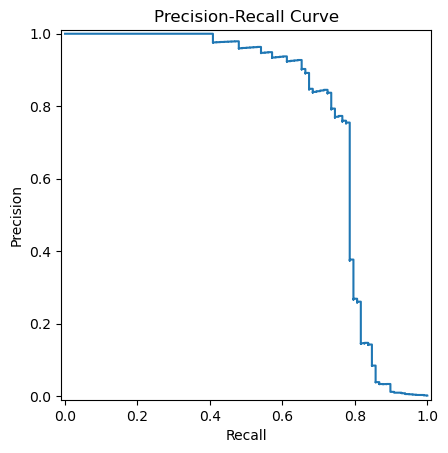

precision-recall curve for adam


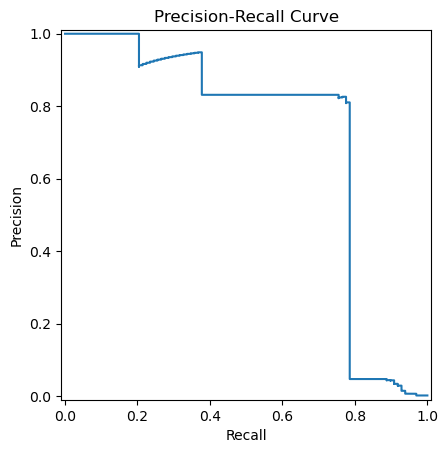

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Calculate precision and recall for rms
precision1, recall1, _ = precision_recall_curve(y_test, y_pred_rms)
print("precision-recall curve for rms")
# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision1, recall=recall1)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()

# Calculate precision and recall for adam
precision2, recall2, _ = precision_recall_curve(y_test, y_pred_adam)
print("precision-recall curve for adam")
# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision2, recall=recall2)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()